# Clustering

Here we discuss two possible methods for clustering:

1. clustering using k-means
2. unsupervised clustering 

# 1st type of clustering

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.cluster import KMeans 

# Sort the most visited clusters of locations
import operator
import collections


def k_mean_from_data(df, k):
    '''
    input data: dataframe with coordinates and k clustere
    output data: 
    Kmean (k clusters) of type sklearn.cluster.k_means_.KMeans
    X_new array of k cluster centres
    '''
    
    # load real data of coordinates 

    Y = df.start_lat.values#latitudestart.values #-2 * np.random.rand(100,2)
    X = df.start_lon.values#longitudestart.values
    Y = np.append(Y, df.dest_lat.values) #latitudestop.values
    X = np.append(X, df.dest_lon.values)
    
    #plt.scatter(X, Y, s = 50, c = 'b')
    #plt.show()

    size_origin = np.shape(df.dest_lat.values)
    print('size of dataframe ', size_origin)

    size = X.shape
    X_data = np.zeros(( int(size[0]),2))
    #print(X_data.shape)
                  
                  
    X_data[:,0] = X 
    X_data[:,1] = Y
          
    print('applying k-means to data')

    #print('plotting data on a map with centres')
    
    Kmean = KMeans(n_clusters=k) #In this case, we arbitrarily gave k (n_clusters) an arbitrary value of two
    Kmean.fit(X_data)

    print('centres of clustering calculated')
    #print(Kmean.cluster_centers_)
    array_cent = Kmean.cluster_centers_

    
    X_new = np.zeros((size_origin[0],2)) 

    X_new[:,0] = Kmean.labels_[0:size_origin[0]]
    X_new[:,1] = Kmean.labels_[size_origin[0]:size[0]]
    

    return Kmean, X_new

# Python3 program to count frequencies of array items 
def countFreq(arr, n): 
    '''retuns dictionary with frequency of array elements'''
  
    mp = dict() # frequency 
  
    # Traverse through array elements and count frequencies 
    for i in range(n): 
        #print(i)
        if arr[i] in mp.keys(): 
            mp[arr[i]] += 1
        else: 
            mp[arr[i]] = 1
              
    # Traverse through map and print  frequencies for x in mp: 
    #    print(x, " ", mp[x]) 
    return mp 

def most_visited_clusters(df, k, i): 
    '''
    returns:
    i-th most visited cluster 
    from k clusters found in dataframe
    Kmean_res, cluster_visited, sorted_dict, elem_i, 
    array_coor - array of coordinates 
    '''
    Kmean_res, X_new = k_mean_from_data(df, k)
    array_clust = np.array(Kmean_res.labels_) 
    print('Kmean labels', array_clust)
    len_arr = len(array_clust) 
    # Print dictionary  with (key)cluster () frequency of visited clusters
    cluster_visited = countFreq(array_clust, len_arr) 
    
    # Sort dictionary by its values 
    #cluster_visited is dictionary with frequency of all visited positions
    #sorted_cluster_visited = sorted(cluster_visited.items(), key=operator.itemgetter(1)) #ordered list
    sorted_dict = dict(sorted(cluster_visited.items(), key=operator.itemgetter(1)))#collections.OrderedDict(sorted_x)
    
    values_sort = list(sorted_dict.values())#sorted_dict.values()
    print('clusters visited', cluster_visited)
    print('sorted dictionary ', values_sort)   
    print('type of sorted dictionary ', type(values_sort))
    
    
    
    plt.plot(np.array(values_sort),'o')
    plt.ylabel('frequency')
    plt.xlabel('sorted cluster number')
    plt.show()
    
    
    # Take ith cluster from sorted dictionary
    elem_i = values_sort[i]#sorted_dict[sorted_dict.keys()[i]]
    print(k-i,'_th element in popularity ', elem_i)
    
    
    for keys, values in cluster_visited.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if values == elem_i:
            cluster_key = keys
            print('key of dictionary with value', keys)
    #print('key of dictionary with value', elem_i)

    # Get Coordinates of cluster centers with shape [n_clusters, n_features]
    Kmean_res.cluster_centers_
    # Get Labels of each point
    Kmean_res.labels_

    # Pythonic way to get the indices of the points for each corresponding cluster
    mydict = {i: np.where(Kmean_res.labels_ == i)[0] for i in range(Kmean_res.n_clusters)}
    #print(mydict)


    # Get numbers of nodes from cluster number 7, 0, 18
    #cluster_key=k-i #number of cluster with i_th populariy
    cluster_i = mydict.get(cluster_key)
    print("the ith frequent cluster")
    print(cluster_i)
    #print(type(cluster_i))


    # Get location coordinates with numbers from this cluster 

    Y = df.start_lat.values #-2 * np.random.rand(100,2)
    X = df.start_lon.values
    Y = np.append(Y, df.start_lat.values)
    X = np.append(X, df.start_lon.values)

    print('X,Y')
    print(np.shape(X),np.shape(Y))


    array_coor = np.zeros((len(cluster_i),2))
    for ind in range(0,len(cluster_i)):
        lon_ind = X[cluster_i[ind]]
        lat_ind = Y[cluster_i[ind]]
        array_coor[ind,0] = lon_ind
        array_coor[ind,1] = lat_ind
    
    print(array_coor)    
    
    
    return Kmean_res, cluster_visited, sorted_dict, elem_i, array_coor
    

In [5]:
# read data
id_researcher1 = '05364098'
df = pd.read_csv('mobility_ID_'+str(id_researcher1)+'_researcher.csv')#id_researcher1
df.head()

,Unnamed: 0,locations,time,start_lat,start_lon,dest_lat,dest_lon
0,0,"{'timestampMs': '1280557864967', 'latitudeE7':...",1.280558e+12,52.325120,8.097732,52.536895,8.113194
1,1,"{'timestampMs': '1280557901000', 'latitudeE7':...",1.280558e+12,52.536895,8.113194,52.557340,8.113479
2,2,"{'timestampMs': '1280557967983', 'latitudeE7':...",1.280558e+12,52.557340,8.113479,52.561325,8.112839
3,3,"{'timestampMs': '1280557969000', 'latitudeE7':...",1.280558e+12,52.561325,8.112839,52.572300,8.110485
4,4,"{'timestampMs': '1280558011227', 'latitudeE7':...",1.280558e+12,52.572300,8.110485,52.612850,8.125504


In [15]:

# specify parameters of clustering
k = 50

Kmean, X_new = k_mean_from_data(df, k)
#Kmean_res, cluster_visited, sorted_dict, el_i, array_coor = most_visited_clusters(df, k, k-i)    
    
    
print('result', Kmean)


size of dataframe  (136571,)
applying k-means to data
centres of clustering calculated
result KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
clusters visited [13 13 13 ...  8  8 26]


In [16]:
visit_clus =  np.array(Kmean.labels_)
print('clusters visited', visit_clus)

clusters visited [13 13 13 ...  8  8 26]


size of dataframe  (136571,)
applying k-means to data
centres of clustering calculated
Kmean labels [8 8 8 ... 6 6 5]
clusters visited {8: 150051, 6: 21185, 1: 21466, 7: 60270, 2: 2638, 4: 1052, 0: 3542, 3: 5528, 5: 3894, 9: 3516}
sorted dictionary  [1052, 2638, 3516, 3542, 3894, 5528, 21185, 21466, 60270, 150051]
type of sorted dictionary  <class 'list'>


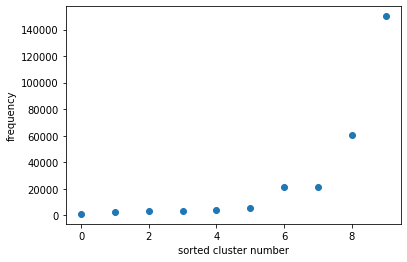

7 _th element in popularity  3542
key of dictionary with value 0
the ith frequent cluster
[ 51984  51985  51986 ... 258092 258093 258094]
X,Y
(273142,) (273142,)
[[-118.4111425   33.9371425]
 [-118.4108147   33.9454475]
 [-118.4108129   33.9449022]
 ...
 [-117.1981307   32.733359 ]
 [-117.1980791   32.7333458]
 [-117.1980122   32.7333123]]
array of coordinates [[-118.4111425   33.9371425]
 [-118.4108147   33.9454475]
 [-118.4108129   33.9449022]
 ...
 [-117.1981307   32.733359 ]
 [-117.1980791   32.7333458]
 [-117.1980122   32.7333123]]


In [29]:
# the number of the most frequently visited cluster 
k = 10
i = 3 

Kmean_res, cluster_visited, sorted_dict, el_i, array_coor  = most_visited_clusters(df, k, i)

print('array of coordinates', array_coor)

size of dataframe  (136571,)
applying k-means to data
centres of clustering calculated
Kmean labels [13 13 13 ...  0  0 23]
clusters visited {13: 21079, 29: 1438, 19: 1836, 21: 43958, 4: 77980, 8: 8934, 25: 6688, 22: 1400, 1: 60272, 12: 11406, 26: 40, 5: 1052, 11: 3540, 17: 342, 3: 1382, 20: 4404, 10: 2354, 15: 132, 6: 3890, 24: 442, 7: 1558, 28: 74, 18: 934, 27: 1958, 14: 1064, 2: 1776, 9: 822, 0: 11867, 16: 516, 23: 4}
sorted dictionary  [4, 40, 74, 132, 342, 442, 516, 822, 934, 1052, 1064, 1382, 1400, 1438, 1558, 1776, 1836, 1958, 2354, 3540, 3890, 4404, 6688, 8934, 11406, 11867, 21079, 43958, 60272, 77980]
type of sorted dictionary  <class 'list'>


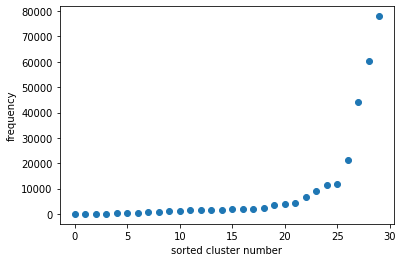

27 _th element in popularity  132
key of dictionary with value 15
the ith frequent cluster
[ 60331  60332  60333  60334  60335  60336  60337  60338  60339  60340
  60341  60342  60343  60344  60345  60346  60347  60348  60349  62558
  62559  62560  62561  62562  62563  62564  62565  62566  62567  62568
  72149  72150  72151  72152  72153  72154  72155  72156  72157  72158
  72159  72160  72161  72162  72163  72164  72165  72166  72167  72168
  72169  72170  72171  72172  84380  84381  84382  84383  84384  84385
  84386  84387  84388  84389  84390  84391 196901 196902 196903 196904
 196905 196906 196907 196908 196909 196910 196911 196912 196913 196914
 196915 196916 196917 196918 196919 199128 199129 199130 199131 199132
 199133 199134 199135 199136 199137 199138 208719 208720 208721 208722
 208723 208724 208725 208726 208727 208728 208729 208730 208731 208732
 208733 208734 208735 208736 208737 208738 208739 208740 208741 208742
 220950 220951 220952 220953 220954 220955 220956 220957 

In [30]:
# the number of the most frequently visited cluster 
k = 30
i = 3 

Kmean_res, cluster_visited, sorted_dict, el_i, array_coor  = most_visited_clusters(df, k, i)

print('array of coordinates', array_coor)

In [23]:
# plot positions of the most frequent clusters 

def plot_positions(X,Y):
    plt.scatter(X, Y, s = 50, c = 'b')
    plt.show()


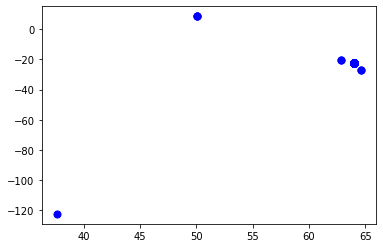

In [28]:
plot_positions(array_coor[:,1], array_coor[:,0])

# 2nd type of clustering

Unsupervised clustering. 

# Data preprocessing
prepare data for 2nd type of clustering

In [ ]:
# Apply algorithm to data 

userID = '' #leave empty

datafilt = get_filtred_trips(df_full,userID)
dataclus = cluster_trips(datafilt)
print('clusters')
print(dataclus)

print(datafilt)
print('datafilt type', datafilt)
print(type(dataclus))